# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [30]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')


# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [58]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [18]:
# 前15大
app_train["AMT_INCOME_TOTAL"].sort_values(ascending=False).head(15)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
103006      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
20216       3825000.0
49645       3600000.0
284311      3600000.0
82846       3375000.0
86026       3375000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [21]:
# 前15小
app_train["AMT_INCOME_TOTAL"].sort_values().head(15)

1678      25650.0
20727     25650.0
240137    26100.0
186643    26100.0
246104    26100.0
132707    26460.0
262748    26550.0
175433    26550.0
4735      27000.0
187572    27000.0
292142    27000.0
124146    27000.0
125059    27000.0
10585     27000.0
62585     27000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
app_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### 觀察收入前15的人發現，收入第一的人較第二的人多非常多，以等寬切分會發現分布非常不均。

In [38]:
app_train["EQUAL_WIDTH_AMT_INCOME_TOTAL"] = pd.cut(app_train["AMT_INCOME_TOTAL"], 10)

In [39]:
# 觀察等寬劃分下, 每個種組距各出現幾次
app_train["EQUAL_WIDTH_AMT_INCOME_TOTAL"].value_counts()

(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(105302565.0, 117000000.0]         1
(93605130.0, 105302565.0]          0
(81907695.0, 93605130.0]           0
(70210260.0, 81907695.0]           0
(58512825.0, 70210260.0]           0
(46815390.0, 58512825.0]           0
(35117955.0, 46815390.0]           0
(23420520.0, 35117955.0]           0
Name: EQUAL_WIDTH_AMT_INCOME_TOTAL, dtype: int64

#### 若以等距切分會發現每個區間劃分的間距寬度落差非常大，也是因為資料分布的關係，但以分析此欄位來說，等頻劃分較等寬劃分有意義。

In [36]:
app_train["EQUAL_FREQ_AMT_INCOME_TOTAL"] = pd.qcut(app_train["AMT_INCOME_TOTAL"], 10)

In [37]:
# 觀察等頻劃分下, 每個種組距各出現幾次
app_train["EQUAL_FREQ_AMT_INCOME_TOTAL"].value_counts()

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: EQUAL_FREQ_AMT_INCOME_TOTAL, dtype: int64

#### 必須整理AMT_INCOME_TOTAL的資料才能從圖表上勉強看出分布

In [59]:
# 將收入過大的少數人先清除，以利看到分布範圍的圖表
app_train.loc[app_train['AMT_INCOME_TOTAL']>400000, 'AMT_INCOME_TOTAL'] = np.nan
app_train["EQUAL_FREQ_AMT_INCOME_TOTAL"] = pd.qcut(app_train["AMT_INCOME_TOTAL"], 10)

In [60]:
# 觀察等頻劃分下, 每個種組距各出現幾次
app_train["EQUAL_FREQ_AMT_INCOME_TOTAL"].value_counts()

(112500.0, 135000.0]    48849
(96300.0, 112500.0]     40686
(25649.999, 81000.0]    33391
(139500.0, 157500.0]    32686
(157500.0, 180000.0]    32529
(266602.5, 397867.5]    29945
(220500.0, 266602.5]    29855
(81000.0, 96300.0]      26501
(180000.0, 220500.0]    24064
(135000.0, 139500.0]      942
Name: EQUAL_FREQ_AMT_INCOME_TOTAL, dtype: int64

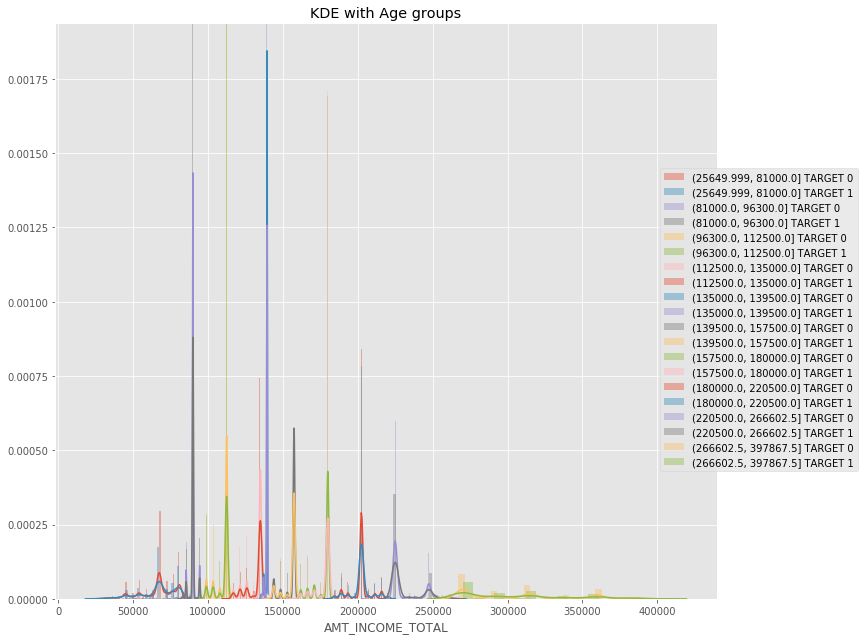

In [61]:
# 繪圖前先排序 / 分組
year_group_sorted = list(app_train['EQUAL_FREQ_AMT_INCOME_TOTAL'].value_counts().sort_index().index)

fig = plt.figure(figsize=(12,12))
for i in range(len(year_group_sorted)):
    sns.distplot(app_train.loc[(app_train['EQUAL_FREQ_AMT_INCOME_TOTAL'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 0), 'AMT_INCOME_TOTAL'], label = str(year_group_sorted[i]) + ' TARGET 0')
    
    sns.distplot(app_train.loc[(app_train['EQUAL_FREQ_AMT_INCOME_TOTAL'] == year_group_sorted[i]) & \
                              (app_train['TARGET'] == 1), 'AMT_INCOME_TOTAL'], label = str(year_group_sorted[i]) + ' TARGET 1')
plt.title('KDE with Age groups')
fig.legend(loc = 'center right')
plt.tight_layout(rect = [0,0,0.85,0.75])
plt.show()